In [1]:
import pandas as pd

from src.backend.data import TimeSpan, read_data
from src.backend.models.timesfm.model import TimesFm

## Load data

In [19]:
df = read_data(ticker="C:AUDUSD", start="2024-05-15", end="2024-05-20", multiplier=1, timespan=TimeSpan.MINUTE)
df["ds"] = pd.to_datetime(df["t"], unit="ms")
df["unique_id"] = df.index

## Load Model

In [3]:
tfm = TimesFm(
    context_len=32,
    horizon_len=30,
    input_patch_len=32,
    output_patch_len=128,
    num_layers=20,
    model_dims=1280,
    backend="cpu",
)
tfm.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing model weights.


Constructed model weights in 3.83 seconds.
Restoring checkpoint from /home/ubuntu_ssm/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 1.33 seconds.
Jitting decoding.
Jitted decoding in 25.64 seconds.


## Inference

In [21]:
forecast_df = tfm.forecast_on_df(
    inputs=df,
    freq="MIN",
    value_name="c",
    num_jobs=1,
)

Processing dataframe with single process.
Finished preprocessing dataframe.
Finished forecasting.


/home/ubuntu_ssm/.cache/pypoetry/virtualenvs/trading-bot-9uxsvEG9-py3.10/lib/python3.10/site-packages/utilsforecast/processing.py:374: FutureWarning: 'MIN' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/ubuntu_ssm/.cache/pypoetry/virtualenvs/trading-bot-9uxsvEG9-py3.10/lib/python3.10/site-packages/utilsforecast/processing.py:428: FutureWarning: 'MIN' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


<Axes: xlabel='ds', ylabel='c'>

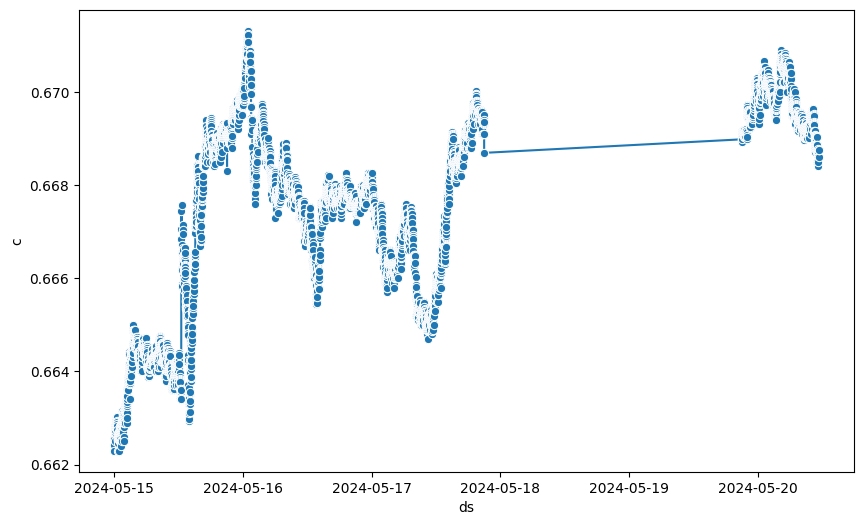

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='ds', y='c', data=df, marker='o')

<Axes: xlabel='ds', ylabel='timesfm'>

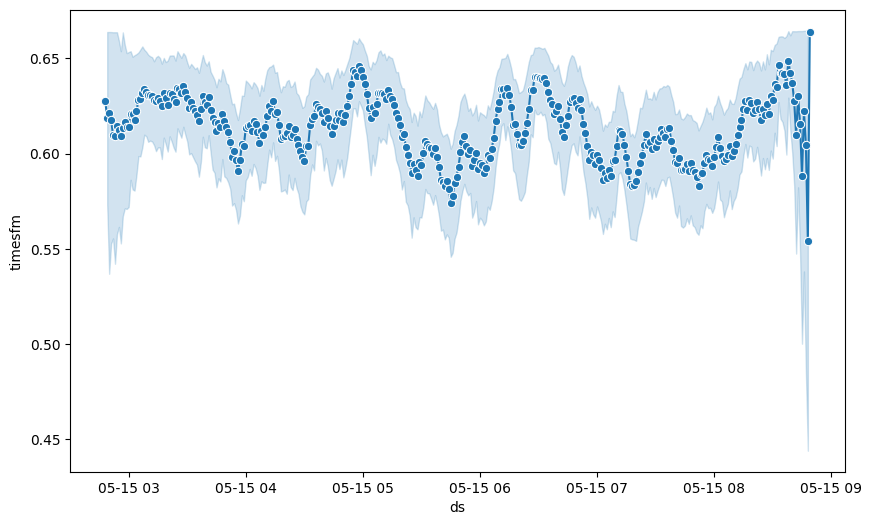

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ds', y='timesfm', data=forecast_df[5000:15_000], marker='o')